In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
raw_data_x = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]

In [34]:
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [30]:
x_train = np.array(raw_data_x)
x_train

array([[3.39353321, 2.33127338],
       [3.11007348, 1.78153964],
       [1.34380883, 3.36836095],
       [3.58229404, 4.67917911],
       [2.28036244, 2.86699026],
       [7.42343694, 4.69652288],
       [5.745052  , 3.5339898 ],
       [9.17216862, 2.51110105],
       [7.79278348, 3.42408894],
       [7.93982082, 0.79163723]])

In [35]:
y_train = np.array(raw_data_y)
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

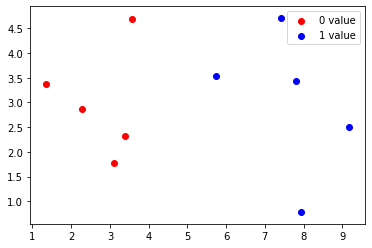

In [37]:
plt.figure()
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color = "red", label="0 value")
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color = "blue", label="1 value")
plt.legend()
plt.show()

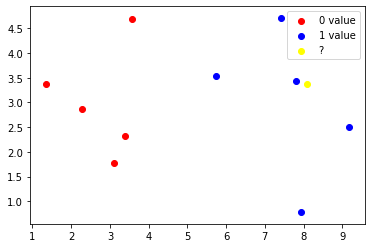

In [38]:
x = np.array([8.093607318, 3.365731514])
plt.figure()
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color = "red", label="0 value")
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color = "blue", label="1 value")
plt.scatter(x[0], x[1], color = "yellow", label="? ")
plt.legend()
plt.show()

## knn算法实现过程

In [39]:
from math import sqrt
distance = [] 
for point in x_train:
    d = sqrt(np.sum((point - x) ** 2))
    distance.append(d)
distance

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [40]:
distance = [sqrt(np.sum((point - x) ** 2)) for point in x_train]
distance

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [41]:
np.argsort(distance)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [42]:
nearst = np.argsort(distance)

In [43]:
k = 6
topK_y = [y_train[i] for i in nearst[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [44]:
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [47]:
votes = Counter(topK_y)
votes.most_common(1)

[(1, 5)]

In [48]:
votes.most_common(2)

[(1, 5), (0, 1)]

In [49]:
votes.most_common(1)[0][0]

1

In [50]:
predict_y = votes.most_common(1)[0][0]
predict_y

1